In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
#import matplotlib

In [3]:
import pandas as pd
import numpy as np
import sqlite3

df = sqlite3.connect('/Users/pep/Downloads/Great_Outdoors_Data_SQLite/go_sales.sqlite')
d = df.cursor() 

In [4]:

order_details = pd.read_sql_query("SELECT * FROM order_details", df)
returned_item = pd.read_sql_query("SELECT * FROM returned_item", df)
return_reason = pd.read_sql_query("SELECT * FROM return_reason", df)
return_reason


,RETURN_REASON_CODE,RETURN_DESCRIPTION_EN,TRIAL888
0,1,Defective product,T
1,2,Incomplete product,T
2,3,Wrong product ordered,T
3,4,Wrong product shipped,T
4,5,Unsatisfactory product,T


In [5]:
returned_item

,RETURN_CODE,RETURN_DATE,ORDER_DETAIL_CODE,RETURN_REASON_CODE,RETURN_QUANTITY,TRIAL888
0,1491,1-8-2021 04:10:24,84858,5,8,T
1,1492,6-12-2020 18:46:19,84440,2,2,T
2,1493,24-6-2021 09:23:14,84867,4,22,T
3,1494,21-7-2021 00:00:09,84873,3,20,T
4,1496,7-10-2020 05:13:58,84488,1,2,T
...,...,...,...,...,...,...
701,2465,6-6-2021 09:22:12,114972,3,24,T
702,2466,6-10-2021 12:31:25,114983,5,66,T
703,2467,31-3-2022 15:39:38,115215,4,64,T
704,2468,23-12-2022 19:48:50,115171,1,2,T


In [6]:
merge = pd.merge(order_details, returned_item, left_on = 'ORDER_DETAIL_CODE', how='inner', right_on= 'ORDER_DETAIL_CODE')
merge

,ORDER_DETAIL_CODE,ORDER_NUMBER,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,TRIAL879,RETURN_CODE,RETURN_DATE,RETURN_REASON_CODE,RETURN_QUANTITY,TRIAL888
0,100146,8465,15,16,504.54,756.82,593.5,T,1975,9-8-2021 18:45:17,4,16,T
1,100149,9116,16,64,1.02,2.05,2.05,T,1976,6-7-2021 13:34:59,5,64,T
2,100199,9113,30,22,6.78,13.57,13.57,T,1979,6-7-2021 07:19:36,4,22,T
3,100250,9254,43,52,126.51,189.77,189.77,T,2298,14-12-2021 11:28:50,1,6,T
4,100641,9269,111,6,81.87,180.13,180.13,T,2301,19-12-2021 04:10:53,4,6,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,99739,9250,15,16,554.59,831.88,626.94,T,1974,9-11-2020 13:32:27,1,2,T
702,99746,8444,17,34,64.36,90.09,90.09,T,1977,18-8-2020 19:48:51,1,2,T
703,99807,8440,33,70,19.62,29.44,29.44,T,1980,22-11-2020 13:33:29,1,6,T
704,99810,9251,34,54,32.02,51.24,51.24,T,1981,17-10-2020 19:48:21,3,54,T


In [7]:
merge = merge.loc[:, ['PRODUCT_NUMBER', 'QUANTITY', 'UNIT_COST',  'UNIT_SALE_PRICE', 'RETURN_REASON_CODE']]
merge

,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_SALE_PRICE,RETURN_REASON_CODE
0,15,16,504.54,593.5,4
1,16,64,1.02,2.05,5
2,30,22,6.78,13.57,4
3,43,52,126.51,189.77,1
4,111,6,81.87,180.13,4
...,...,...,...,...,...
701,15,16,554.59,626.94,1
702,17,34,64.36,90.09,1
703,33,70,19.62,29.44,1
704,34,54,32.02,51.24,3


In [8]:
merge['UNIT_SALE_PRICE'] = merge['UNIT_SALE_PRICE'].astype('double')
merge['UNIT_COST'] = merge['UNIT_COST'].astype('double')
merge['PRODUCT_NUMBER'] = merge['PRODUCT_NUMBER'].astype(int)


merge.dtypes

PRODUCT_NUMBER          int64
QUANTITY                int64
UNIT_COST             float64
UNIT_SALE_PRICE       float64
RETURN_REASON_CODE     object
dtype: object

In [9]:
dumie_df = pd.get_dummies(merge.loc[:, ['RETURN_REASON_CODE']])
dumie_df = dumie_df.astype(int)
dumie_df

,RETURN_REASON_CODE_1,RETURN_REASON_CODE_2,RETURN_REASON_CODE_3,RETURN_REASON_CODE_4,RETURN_REASON_CODE_5
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
701,1,0,0,0,0
702,1,0,0,0,0
703,1,0,0,0,0
704,0,0,1,0,0


In [67]:
# merge = pd.concat([merge, dumie_df], axis = 1)
# merge = merge.loc[:, ['RETURN_REASON_CODE_1', 'RETURN_REASON_CODE_2', 'RETURN_REASON_CODE_3', 'RETURN_REASON_CODE_4', 'RETURN_REASON_CODE_5', 'PRODUCT_NUMBER', 'QUANTITY', 'UNIT_SALE_PRICE']]
# merge

,RETURN_REASON_CODE_1,RETURN_REASON_CODE_2,RETURN_REASON_CODE_3,RETURN_REASON_CODE_4,RETURN_REASON_CODE_5,PRODUCT_NUMBER,QUANTITY,UNIT_SALE_PRICE
0,0,0,0,1,0,15,16,593.50
1,0,0,0,0,1,16,64,2.05
2,0,0,0,1,0,30,22,13.57
3,1,0,0,0,0,43,52,189.77
4,0,0,0,1,0,111,6,180.13
...,...,...,...,...,...,...,...,...
701,1,0,0,0,0,15,16,626.94
702,1,0,0,0,0,17,34,90.09
703,1,0,0,0,0,33,70,29.44
704,0,0,1,0,0,34,54,51.24


In [10]:
x = merge.drop('RETURN_REASON_CODE', axis=1)
y = merge.loc[:, ['RETURN_REASON_CODE']]
x

,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_SALE_PRICE
0,15,16,504.54,593.50
1,16,64,1.02,2.05
2,30,22,6.78,13.57
3,43,52,126.51,189.77
4,111,6,81.87,180.13
...,...,...,...,...
701,15,16,554.59,626.94
702,17,34,64.36,90.09
703,33,70,19.62,29.44
704,34,54,32.02,51.24


In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.15,
    random_state=42
)

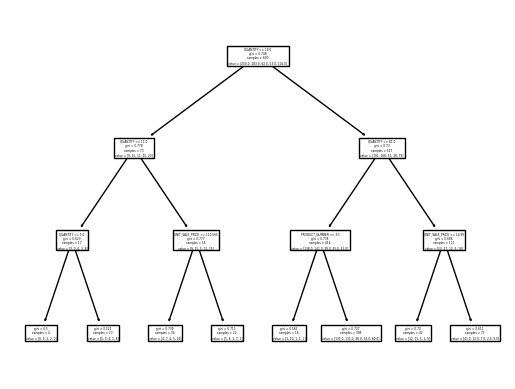

In [12]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(x_train, y_train)
tree.plot_tree(dtree, feature_names= x.columns)
plt.show()

In [13]:
predicted_df = pd.DataFrame(dtree.predict(x_test))
predicted_df = predicted_df.rename(columns= {0 : 'Predicted_Return_reason'})
model_results_frame = pd.concat([y_test.reset_index()['RETURN_REASON_CODE'], predicted_df], axis=1)
model_results_frame

,RETURN_REASON_CODE,Predicted_Return_reason
0,1,1
1,1,2
2,1,2
3,1,1
4,1,1
...,...,...
101,2,1
102,4,5
103,1,1
104,5,2


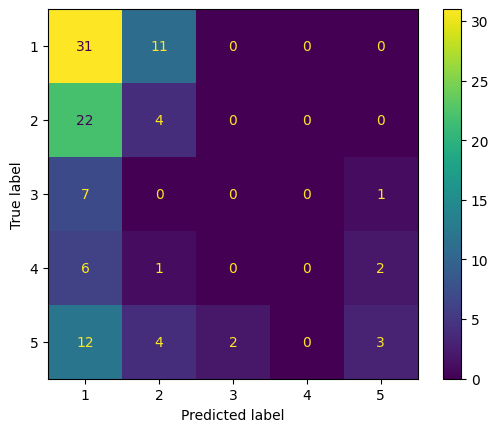

In [14]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['RETURN_REASON_CODE'], model_results_frame['Predicted_Return_reason'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix, display_labels=[1, 2, 3, 4, 5])

cm_display.plot()
plt.show()

In [15]:
metrics.accuracy_score(model_results_frame['RETURN_REASON_CODE'], model_results_frame['Predicted_Return_reason'])

0.3584905660377358